# Heart Disease

Heart Disease | Prediction
- | -
<img src="health-robot.jpg" width="240px"> | <img src="heart-attack.jpg" width="300px"> 

# Importando las librerias

In [66]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import warnings
import sys

import sklearn
from sklearn import tree
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.metrics import confusion_matrix

from sklearn.tree import export_graphviz
from sklearn.externals.six import StringIO  
from IPython.display import Image  
import pydotplus

from sklearn.naive_bayes import GaussianNB
gnb = GaussianNB()

from sklearn.neural_network import MLPClassifier
from sklearn.preprocessing import StandardScaler

from keras.models import Sequential
from keras.layers.core import Dense

from IPython.display import HTML

# Cargando los datos

In [3]:
trainx = pd.read_csv("./heart.csv")

In [4]:
trainx.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [5]:
trainx.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


# Significado de los atributos
<ul>
    <li>
        <h3>Age:</h3>
        Edad de la persona
    </li>
    <li>
        <h3>Sex:</h3>
        Sexo de la persona (1 para hombre, 0 para mujer)
    </li>
    <li>
        <h3>cp:</h3>
        Chest pain experienced - Experencia de dolor en el pecho
        0: angino tipico <br>
        1: angina atipico<br>
        2: Dolor no anginal<br>
        3: asymptomatico       
    </li>
        <li>
        <h3>trestbps:</h3>
        La presión arterial en reposo de la persona
    </li>
        <li>
        <h3>chol:</h3>
        Colesterol de la persona (mg/dl)
    </li>
        <li>
        <h3>fbs:</h3>
        El azúcar en sangre de la persona en ayunas (> 120 mg/dl, 1: true; 0: false) 
    </li>
        <li>
        <h3>restecg:</h3>
        resting electrocardiographic results
        0: normal<br>
        1: having ST-T wave abnormality (T wave inversions and/or ST elevation or depression of > 0.05 mV)<br>
        2: showing probable or definite left ventricular hypertrophy by Estes' criteria
    </li>
        <li>
        <h3>thalach:</h3>
        El registro de la frecuencia cardíaca máxima de la persona
    </li>
        <li>
        <h3>Exang:</h3>
         Angina inducida por ejercicio (1: si; 0: no)
    </li>
    <li>
        <h3>oldpeak:</h3>
         Depresión del ST inducida por el ejercicio relativo al descanso
    </li>
    <li>
        <h3>slope:</h3>
         la pendiente del segmento pico del ejercicio ST<br>
         0: pendiente ascendente<br>
         1: plano<br>
         2: pendiente descendente<br>
    </li>
    <li>
        <h3>ca:</h3>
         El número de vasos principales (0-3)
    </li>
    <li>
        <h3>thal:</h3>
         Trastorno sanguíneo conocido como talasemia<br>
         3: normal<br>
         6: defecto fijo<br>
         7: efecto reversible
    </li>
       <li>
        <h3>Desease:</h3>
         0: No Enfermo<br>
         1: Enfermo
    </li> 
    
</ul>

In [6]:
# NAS
# trainx["age"] = trainx["age"].fillna(trainx["age"].median())
# trainx["cp"] = trainx["cp"].fillna(trainx["cp"].median())
# trainx["trestbps"] = trainx["trestbps"].fillna(trainx["trestbps"].median())
# trainx["chol"] = trainx["chol"].fillna(trainx["chol"].median())
# trainx["thalach"] = trainx["thalach"].fillna(trainx["thalach"].median())
# trainx["oldpeak"] = trainx["oldpeak"].fillna(trainx["oldpeak"].median())

In [7]:
# Category types
# trainx['sex'] = trainx['sex'].astype('category')
# trainx['cp'] = trainx['cp'].astype('category')
# trainx['fbs'] = trainx['fbs'].astype('category')
# trainx['restecg'] = trainx['restecg'].astype('category')
# trainx['exang'] = trainx['exang'].astype('category')
# trainx['slope'] = trainx['slope'].astype('category')
# trainx['thal'] = trainx['thal'].astype('category')
# trainx['ca'] = trainx['ca'].astype('category')
# trainx['target'] = trainx['target'].astype('category')

print(trainx.dtypes)

age           int64
sex           int64
cp            int64
trestbps      int64
chol          int64
fbs           int64
restecg       int64
thalach       int64
exang         int64
oldpeak     float64
slope         int64
ca            int64
thal          int64
target        int64
dtype: object


<h3>Datos completos</h3>

In [8]:
print(trainx.isnull().sum())
print("------------------")
print(trainx.isna().sum())

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64
------------------
age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64


# Gráficas de los datos

<h2>Histogramas</h2>

Variables:

<ul>
    <li>
    Age
    </li>
    <li>
    Trestbps
    </li>
    <li>
    chol
    </li>
    <li>
    Thalach
    </li>
    <li>
    Oldpeak
    </li>
</ul>

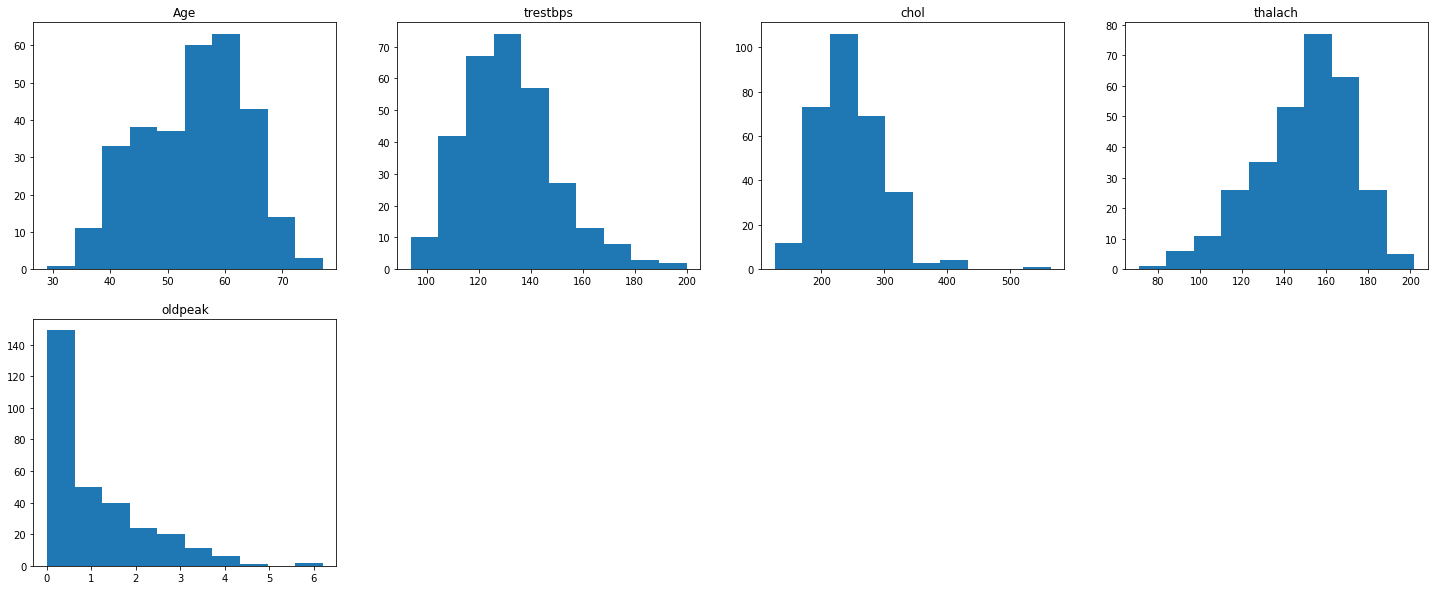

In [9]:
counts, bins = np.histogram(trainx["age"])
counts2, bins2 = np.histogram(trainx["trestbps"])
counts3, bins3 = np.histogram(trainx["chol"])
counts4, bins4 = np.histogram(trainx["thalach"])
counts5, bins5 = np.histogram(trainx["oldpeak"])

plt.figure(figsize=(25,10))

plt.subplot(2, 4, 1)
plt.hist(bins[:-1], bins, weights=counts)
plt.title('Age')
plt.ylabel('')

plt.subplot(2, 4, 2)
plt.hist(bins2[:-1], bins2, weights=counts2)
plt.title('trestbps')
plt.ylabel('')

plt.subplot(2, 4, 3)
plt.hist(bins3[:-1], bins3, weights=counts3)
plt.title('chol')
plt.ylabel('')

plt.subplot(2, 4, 4)
plt.hist(bins4[:-1], bins4, weights=counts4)
plt.title('thalach')
plt.ylabel('')

plt.subplot(2, 4, 5)
plt.hist(bins5[:-1], bins5, weights=counts5)
plt.title('oldpeak')
plt.ylabel('')


plt.show()

<h2>Tortas</h2>

Variables:

<ul>
    <li>
    Sex
    </li>
    <li>
    Fbs
    </li>
    <li>
    Restecg
    </li>
    <li>
    Exang
    </li>
    <li>
    Thal
    </li>
    <li>
    Cp
    </li>
    <li>
    Slope
    </li>
    <li>
    Ca
    </li>
    <li>
    Target
    </li>
</ul>

Text(0.5,1,'Target')

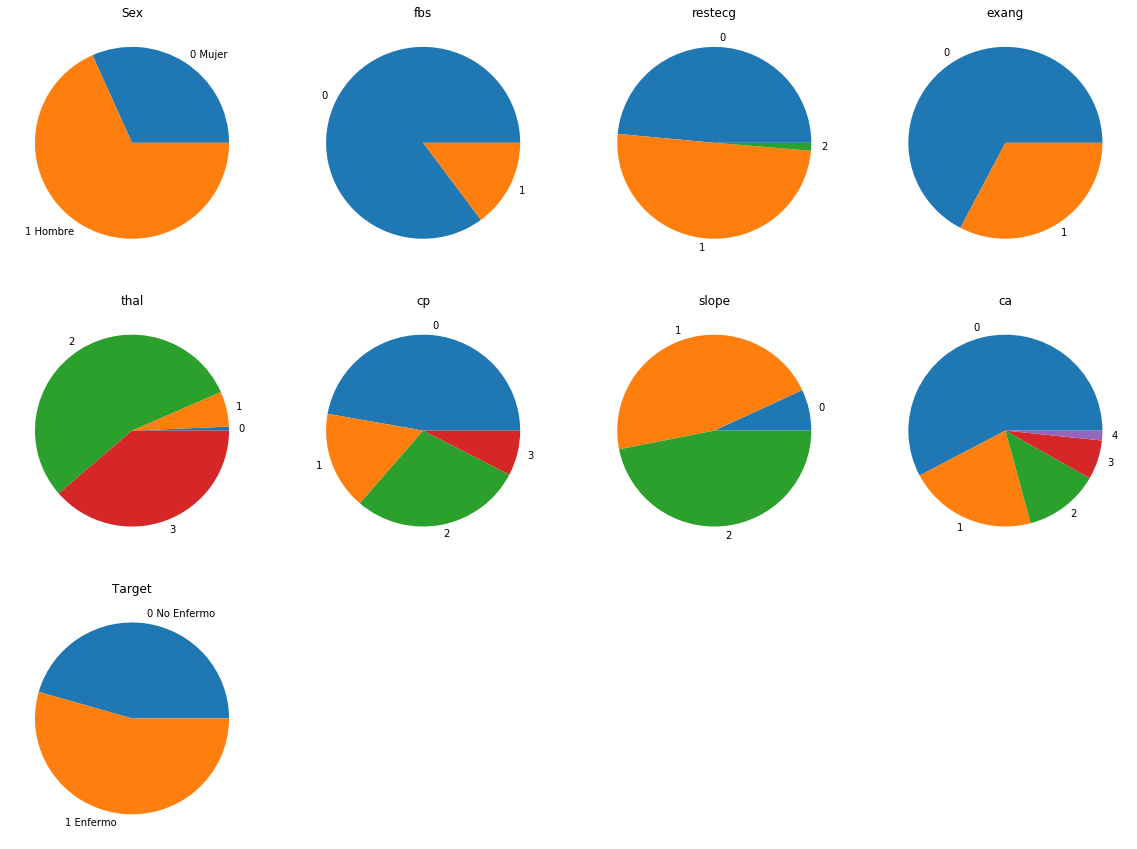

In [48]:
plt.figure(figsize=(20,15))

plt.subplot(3, 4, 1)
labels = ["0 Mujer", "1 Hombre"]
values = [trainx["sex"].count() - trainx["sex"].sum(), trainx["sex"].sum()]
plt.pie(values, labels=labels)
plt.title('Sex')

plt.subplot(3, 4, 2)
labels = ["0", "1"]
values = [trainx["fbs"].count() - trainx["fbs"].sum(), trainx["fbs"].sum()]
plt.pie(values, labels=labels)
plt.title('fbs')

plt.subplot(3, 4, 3)
labels = ["0", "1", "2"]
values = [trainx["restecg"][trainx["restecg"]==0].count(), trainx["restecg"][trainx["restecg"]==1].count(), trainx["restecg"][trainx["restecg"]==2].count()]
plt.pie(values, labels=labels)
plt.title('restecg')

plt.subplot(3, 4, 4)
labels = ["0", "1"]
values = [trainx["exang"].count() - trainx["exang"].sum(), trainx["exang"].sum()]
plt.pie(values, labels=labels)
plt.title('exang')

plt.subplot(3, 4, 5)
labels = ["0", "1", "2", "3"]
values = [trainx["thal"][trainx["thal"]==0].count(), trainx["thal"][trainx["thal"]==1].count(), trainx["thal"][trainx["thal"]==2].count(), trainx["thal"][trainx["thal"]==3].count()]
plt.pie(values, labels=labels)
plt.title('thal')

plt.subplot(3, 4, 6)
labels = ["0", "1", "2", "3"]
values = [trainx["cp"][trainx["cp"]==0].count(), trainx["cp"][trainx["cp"]==1].count(), trainx["cp"][trainx["cp"]==2].count(), trainx["cp"][trainx["cp"]==3].count()]
plt.pie(values, labels=labels)
plt.title('cp')

plt.subplot(3, 4, 7)
labels = ["0", "1", "2"]
values = [trainx["slope"][trainx["slope"]==0].count(), trainx["slope"][trainx["slope"]==1].count(), trainx["slope"][trainx["slope"]==2].count()]
plt.pie(values, labels=labels)
plt.title('slope')

plt.subplot(3, 4, 8)
labels = ["0", "1", "2", "3", "4"]
values = [trainx["ca"][trainx["ca"]==0].count(), trainx["ca"][trainx["ca"]==1].count(), trainx["ca"][trainx["ca"]==2].count(), trainx["ca"][trainx["ca"]==3].count(), trainx["ca"][trainx["ca"]==4].count()]
plt.pie(values, labels=labels)
plt.title('ca')

plt.subplot(3, 4, 9)
labels = ["0 No Enfermo", "1 Enfermo"]
values = [trainx["target"][trainx["target"]==0].count(), trainx["target"][trainx["target"]==1].count()]
plt.pie(values, labels=labels)
plt.title('Target')



In [21]:
# atributos y target
features = trainx[["age", "cp", "trestbps", "chol", "thalach", "oldpeak", "sex", "fbs", "restecg", "exang", "thal", "slope", "ca"]].values
target = trainx["target"].values

# Diviendo datos para entrenar es probar
trainX, testX, trainY, testY = train_test_split(features, target, test_size=0.2, train_size=0.28)
print(trainX.shape, trainY.shape)
print(testX.shape, testY.shape)

((84, 13), (84,))
((61, 13), (61,))


# Árboles de decisión

In [57]:
model1 = tree.DecisionTreeClassifier(max_depth = 5, min_samples_split = 2)
#model1 = tree.DecisionTreeClassifier(max_depth = 5, min_samples_split = 5, random_state = 1)
# model1 = tree.DecisionTreeClassifier()

model1 = model1.fit(trainX, trainY)

#Print the score on the train data
print("Train: " + str(model1.score(trainX, trainY)))
#Print the score on the test data
print("Test: " + str(model1.score(testX, testY)))

# Para árboles
# print(confusion_matrix(model1.predict(testX), testY))

# y_pred = model1.predict(testX)
# print(y_pred)

# print("Accuracy:",metrics.accuracy_score(testY, y_pred))

Train: 0.9642857142857143
Test: 0.7213114754098361


array([[23, 13],
       [ 4, 21]])

In [60]:
print("Matriz de confusión")
confusion_matrix(model1.predict(testX), testY)

Matriz de confusión


array([[23, 13],
       [ 4, 21]])

# Gráfica de Importancias y Árbol


(array([0.01895351, 0.42772288, 0.03628706, 0.        , 0.10112154,
       0.19663049, 0.        , 0.        , 0.        , 0.11430423,
       0.05913926, 0.04584104, 0.        ]), 0.801980198019802)


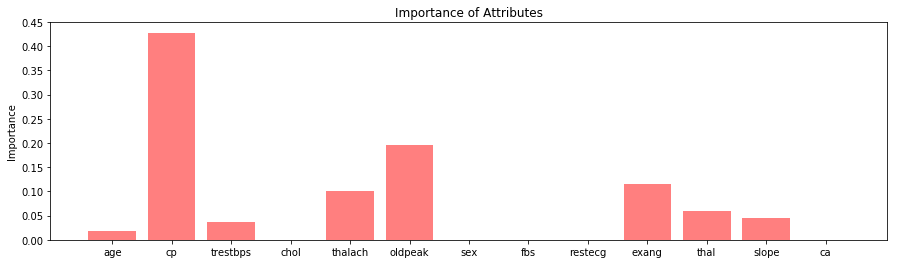

In [58]:
importances = model1.feature_importances_
print(importances, model1.score(features, target))

features_col = ["age", "cp", "trestbps", "chol", "thalach", "oldpeak", "sex", "fbs", "restecg", "exang", "thal", "slope", "ca"]

y_values = np.arange(len(features_col))

plt.figure(figsize=(15,4))
plt.bar(y_values, importances, align='center', alpha=0.5, color='r')
plt.xticks(y_values, features_col)
plt.ylabel('Importance')
plt.title('Importance of Attributes')

plt.show()

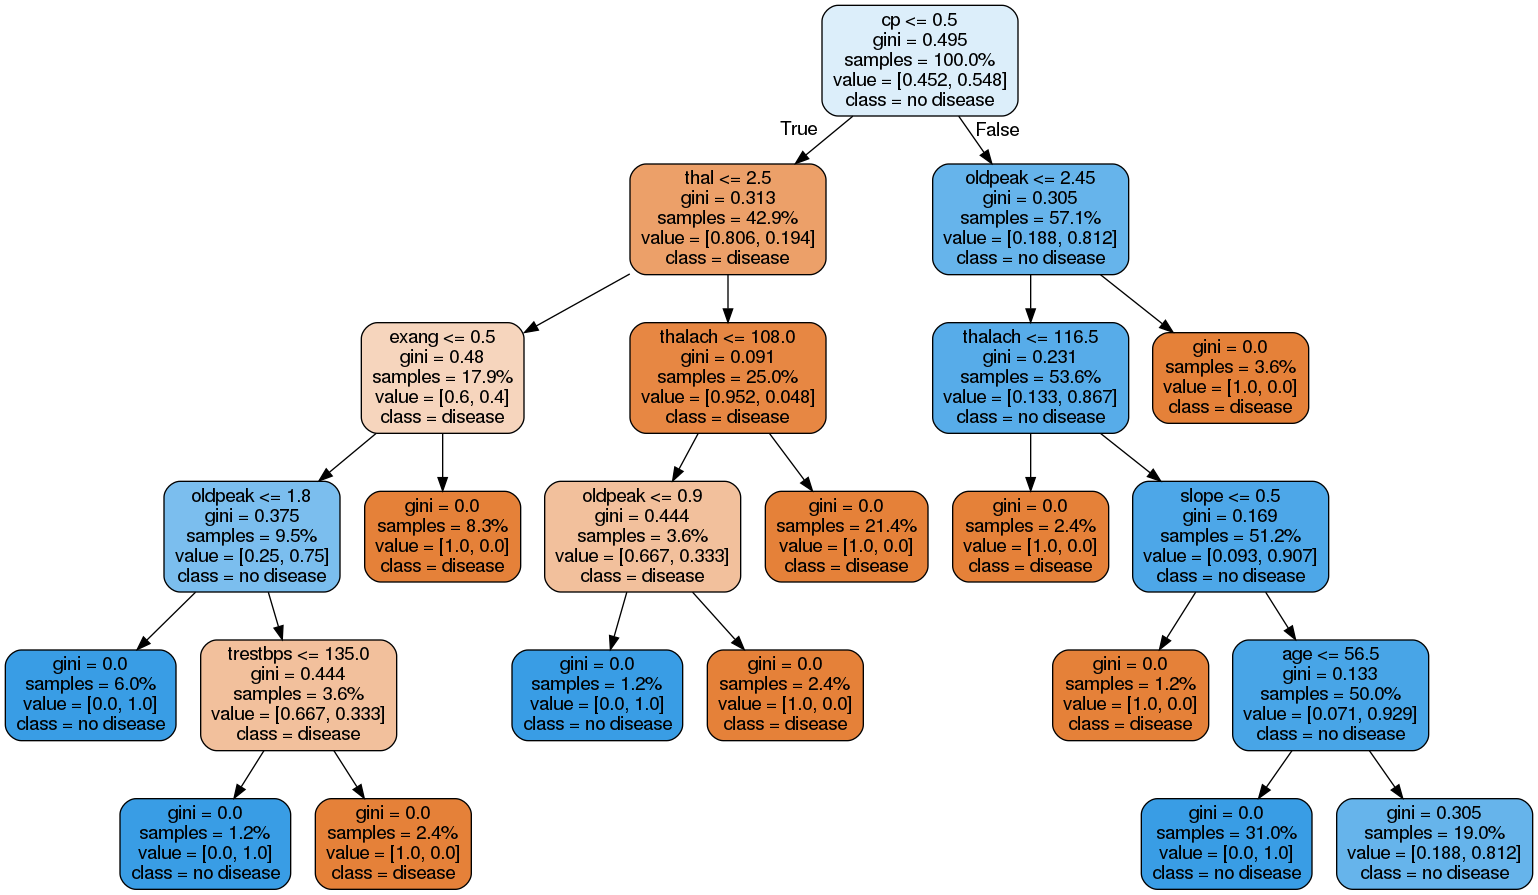

In [59]:

# c = -1;
# for i in importances:
#     c = c + 1
#     if(i == 0.0):
#         features_col.remove(features_col[c])
#         c = c - 1
    
        
        
# print(features_col)

y_train_str = trainY.astype('str')
y_train_str[y_train_str == '0'] = 'no disease'
y_train_str[y_train_str == '1'] = 'disease'

dot_data = StringIO()
export_graphviz(model1, out_file = dot_data, filled = True, rounded = True, proportion = True,
                feature_names = features_col, 
                class_names = y_train_str)


graph = pydotplus.graph_from_dot_data(dot_data.getvalue())
Image(graph.create_png())


# Naive Bayes

In [25]:
model2 = gnb.fit(trainX, trainY)


#Print the score on the train data
print("Train: " + str(model2.score(trainX, trainY)))
#Print the score on the test data
print("Test: " + str(model2.score(testX, testY)))

# y_pred2 = model2.predict(testX)
# print(y_pred2)
# print("Accuracy: ",metrics.accuracy_score(testY, y_pred2))
# print(metrics.classification_report(testY, y_pred2))
# from sklearn.metrics import confusion_matrix



Train: 0.9047619047619048
Test: 0.7213114754098361


array([[22, 12],
       [ 5, 22]])

In [61]:
print("Matriz de confusión")
confusion_matrix(model2.predict(testX), testY)

Matriz de confusión


array([[22, 12],
       [ 5, 22]])

# Neural Network

In [26]:
# NN is sensitive to data scale. We must normilize
scaler = StandardScaler()  
trainXX = trainX.copy()
testXX = testX.copy()
# Don't cheat - fit only on training data
scaler.fit(trainX)  
trainXX = scaler.transform(trainXX)  
# apply same transformation to test data
testXX = scaler.transform(testXX)  

model3 = MLPClassifier(solver='lbfgs', alpha=1e-3, activation = 'relu', max_iter=5000,
                     hidden_layer_sizes = (1), random_state=1, verbose = True)

model3.fit(trainXX, trainY)                         

#Print the score on the train data
print("On training")
print(model3.score(trainXX, trainY))
print(confusion_matrix(model3.predict(trainXX), trainY))

#Print the score on the test data
print("\nOn test")
print(model3.score(testXX, testY))
print(confusion_matrix(model3.predict(testXX), testY))

On training
0.9404761904761905
[[33  0]
 [ 5 46]]

On test
0.7868852459016393
[[21  7]
 [ 6 27]]


In [27]:
network = Sequential()
network.add(Dense(13, input_dim=13, activation='sigmoid'))
network.add(Dense(1, input_dim=13, activation='sigmoid'))
network.add(Dense(13, input_dim=13, activation='sigmoid'))


# network.compile(loss='mean_squared_error', optimizer='adam', metrics=['accuracy'])
network.compile(loss='sparse_categorical_crossentropy', optimizer='adam', metrics=['binary_accuracy'])
# network.compile(loss='mean_squared_error', optimizer='adam', metrics=['binary_accuracy'])
# network.compile(loss='binary_crossentropy', optimizer='adam', metrics=['binary_accuracy'])


network.fit(trainX, trainY, epochs=1000)

scoreT = network.evaluate(testX, testY)
scoreE = network.evaluate(trainX, trainY)

print("Score del test")
print("%s: %.2f%%" % (network.metrics_names[1], scoreT[1]*100))
print("Score del entrenamiento")
print("%s: %.2f%%" % (network.metrics_names[1], scoreE[1]*100))

# predictions = network.predict_classes(testX)





Epoch 1/1000
84/84 [==============================] - 0s 3ms/step - loss: 2.5381 - binary_accuracy: 0.5037
Epoch 2/1000
84/84 [==============================] - 0s 86us/step - loss: 2.5347 - binary_accuracy: 0.5037
Epoch 3/1000
84/84 [==============================] - 0s 86us/step - loss: 2.5309 - binary_accuracy: 0.5037
Epoch 4/1000
84/84 [==============================] - 0s 72us/step - loss: 2.5271 - binary_accuracy: 0.5037
Epoch 5/1000
84/84 [==============================] - 0s 97us/step - loss: 2.5232 - binary_accuracy: 0.5037
Epoch 6/1000
84/84 [==============================] - 0s 95us/step - loss: 2.5194 - binary_accuracy: 0.5037
Epoch 7/1000
84/84 [==============================] - 0s 138us/step - loss: 2.5156 - binary_accuracy: 0.5037
Epoch 8/1000
84/84 [==============================] - 0s 98us/step - loss: 2.5117 - binary_accuracy: 0.5037
Epoch 9/1000
84/84 [==============================] - 0s 148us/step - loss: 2.5078 - binary_accuracy: 0.5037
Epoch 10/1000
84/84 [======

84/84 [==============================] - 0s 106us/step - loss: 2.1854 - binary_accuracy: 0.4670
Epoch 76/1000
84/84 [==============================] - 0s 111us/step - loss: 2.1802 - binary_accuracy: 0.4670
Epoch 77/1000
84/84 [==============================] - 0s 124us/step - loss: 2.1750 - binary_accuracy: 0.4670
Epoch 78/1000
84/84 [==============================] - 0s 102us/step - loss: 2.1698 - binary_accuracy: 0.4670
Epoch 79/1000
84/84 [==============================] - 0s 113us/step - loss: 2.1647 - binary_accuracy: 0.4670
Epoch 80/1000
84/84 [==============================] - 0s 114us/step - loss: 2.1596 - binary_accuracy: 0.4670
Epoch 81/1000
84/84 [==============================] - 0s 92us/step - loss: 2.1545 - binary_accuracy: 0.4670
Epoch 82/1000
84/84 [==============================] - 0s 97us/step - loss: 2.1495 - binary_accuracy: 0.4670
Epoch 83/1000
84/84 [==============================] - 0s 91us/step - loss: 2.1444 - binary_accuracy: 0.4670
Epoch 84/1000
84/84 [======

84/84 [==============================] - 0s 80us/step - loss: 1.8298 - binary_accuracy: 0.4670
Epoch 150/1000
84/84 [==============================] - 0s 89us/step - loss: 1.8255 - binary_accuracy: 0.4670
Epoch 151/1000
84/84 [==============================] - 0s 66us/step - loss: 1.8213 - binary_accuracy: 0.4670
Epoch 152/1000
84/84 [==============================] - 0s 74us/step - loss: 1.8171 - binary_accuracy: 0.4670
Epoch 153/1000
84/84 [==============================] - 0s 83us/step - loss: 1.8129 - binary_accuracy: 0.4670
Epoch 154/1000
84/84 [==============================] - 0s 81us/step - loss: 1.8086 - binary_accuracy: 0.4670
Epoch 155/1000
84/84 [==============================] - 0s 79us/step - loss: 1.8045 - binary_accuracy: 0.4670
Epoch 156/1000
84/84 [==============================] - 0s 86us/step - loss: 1.8003 - binary_accuracy: 0.4670
Epoch 157/1000
84/84 [==============================] - 0s 72us/step - loss: 1.7961 - binary_accuracy: 0.4670
Epoch 158/1000
84/84 [===

84/84 [==============================] - 0s 75us/step - loss: 1.5469 - binary_accuracy: 0.4670
Epoch 224/1000
84/84 [==============================] - 0s 102us/step - loss: 1.5436 - binary_accuracy: 0.4670
Epoch 225/1000
84/84 [==============================] - 0s 88us/step - loss: 1.5402 - binary_accuracy: 0.4670
Epoch 226/1000
84/84 [==============================] - ETA: 0s - loss: 1.5404 - binary_accuracy: 0.478 - 0s 115us/step - loss: 1.5369 - binary_accuracy: 0.4670
Epoch 227/1000
84/84 [==============================] - 0s 104us/step - loss: 1.5336 - binary_accuracy: 0.4670
Epoch 228/1000
84/84 [==============================] - 0s 94us/step - loss: 1.5302 - binary_accuracy: 0.4670
Epoch 229/1000
84/84 [==============================] - 0s 130us/step - loss: 1.5270 - binary_accuracy: 0.4670
Epoch 230/1000
84/84 [==============================] - 0s 99us/step - loss: 1.5237 - binary_accuracy: 0.4670
Epoch 231/1000
84/84 [==============================] - 0s 350us/step - loss: 1.5

84/84 [==============================] - 0s 118us/step - loss: 1.3317 - binary_accuracy: 0.4670
Epoch 297/1000
84/84 [==============================] - 0s 117us/step - loss: 1.3292 - binary_accuracy: 0.4670
Epoch 298/1000
84/84 [==============================] - 0s 79us/step - loss: 1.3266 - binary_accuracy: 0.4670
Epoch 299/1000
84/84 [==============================] - 0s 84us/step - loss: 1.3241 - binary_accuracy: 0.4670
Epoch 300/1000
84/84 [==============================] - 0s 127us/step - loss: 1.3216 - binary_accuracy: 0.4670
Epoch 301/1000
84/84 [==============================] - 0s 90us/step - loss: 1.3191 - binary_accuracy: 0.4670
Epoch 302/1000
84/84 [==============================] - 0s 115us/step - loss: 1.3166 - binary_accuracy: 0.4670
Epoch 303/1000
84/84 [==============================] - 0s 99us/step - loss: 1.3141 - binary_accuracy: 0.4670
Epoch 304/1000
84/84 [==============================] - 0s 90us/step - loss: 1.3117 - binary_accuracy: 0.4670
Epoch 305/1000
84/84 

Epoch 370/1000
84/84 [==============================] - 0s 79us/step - loss: 1.1704 - binary_accuracy: 0.4670
Epoch 371/1000
84/84 [==============================] - 0s 81us/step - loss: 1.1685 - binary_accuracy: 0.4670
Epoch 372/1000
84/84 [==============================] - 0s 104us/step - loss: 1.1667 - binary_accuracy: 0.4670
Epoch 373/1000
84/84 [==============================] - 0s 74us/step - loss: 1.1649 - binary_accuracy: 0.4670
Epoch 374/1000
84/84 [==============================] - 0s 85us/step - loss: 1.1630 - binary_accuracy: 0.4670
Epoch 375/1000
84/84 [==============================] - 0s 91us/step - loss: 1.1612 - binary_accuracy: 0.4670
Epoch 376/1000
84/84 [==============================] - 0s 84us/step - loss: 1.1594 - binary_accuracy: 0.4670
Epoch 377/1000
84/84 [==============================] - 0s 84us/step - loss: 1.1577 - binary_accuracy: 0.4670
Epoch 378/1000
84/84 [==============================] - 0s 90us/step - loss: 1.1559 - binary_accuracy: 0.4670
Epoch 379

84/84 [==============================] - 0s 85us/step - loss: 1.0559 - binary_accuracy: 0.4670
Epoch 444/1000
84/84 [==============================] - 0s 97us/step - loss: 1.0546 - binary_accuracy: 0.4670
Epoch 445/1000
84/84 [==============================] - 0s 96us/step - loss: 1.0533 - binary_accuracy: 0.4670
Epoch 446/1000
84/84 [==============================] - 0s 76us/step - loss: 1.0520 - binary_accuracy: 0.4670
Epoch 447/1000
84/84 [==============================] - 0s 90us/step - loss: 1.0507 - binary_accuracy: 0.4670
Epoch 448/1000
84/84 [==============================] - 0s 80us/step - loss: 1.0494 - binary_accuracy: 0.4670
Epoch 449/1000
84/84 [==============================] - 0s 115us/step - loss: 1.0481 - binary_accuracy: 0.4670
Epoch 450/1000
84/84 [==============================] - 0s 76us/step - loss: 1.0468 - binary_accuracy: 0.4670
Epoch 451/1000
84/84 [==============================] - 0s 84us/step - loss: 1.0455 - binary_accuracy: 0.4670
Epoch 452/1000
84/84 [==

Epoch 517/1000
84/84 [==============================] - 0s 205us/step - loss: 0.9728 - binary_accuracy: 0.4670
Epoch 518/1000
84/84 [==============================] - 0s 90us/step - loss: 0.9719 - binary_accuracy: 0.4670
Epoch 519/1000
84/84 [==============================] - 0s 90us/step - loss: 0.9709 - binary_accuracy: 0.4670
Epoch 520/1000
84/84 [==============================] - 0s 81us/step - loss: 0.9700 - binary_accuracy: 0.4670
Epoch 521/1000
84/84 [==============================] - 0s 93us/step - loss: 0.9690 - binary_accuracy: 0.4670
Epoch 522/1000
84/84 [==============================] - 0s 74us/step - loss: 0.9681 - binary_accuracy: 0.4670
Epoch 523/1000
84/84 [==============================] - 0s 113us/step - loss: 0.9672 - binary_accuracy: 0.4670
Epoch 524/1000
84/84 [==============================] - 0s 102us/step - loss: 0.9663 - binary_accuracy: 0.4670
Epoch 525/1000
84/84 [==============================] - 0s 88us/step - loss: 0.9653 - binary_accuracy: 0.4670
Epoch 5

84/84 [==============================] - 0s 89us/step - loss: 0.9135 - binary_accuracy: 0.4670
Epoch 591/1000
84/84 [==============================] - 0s 86us/step - loss: 0.9128 - binary_accuracy: 0.4670
Epoch 592/1000
84/84 [==============================] - 0s 89us/step - loss: 0.9121 - binary_accuracy: 0.4670
Epoch 593/1000
84/84 [==============================] - 0s 76us/step - loss: 0.9114 - binary_accuracy: 0.4670
Epoch 594/1000
84/84 [==============================] - 0s 92us/step - loss: 0.9107 - binary_accuracy: 0.4670
Epoch 595/1000
84/84 [==============================] - 0s 81us/step - loss: 0.9100 - binary_accuracy: 0.4670
Epoch 596/1000
84/84 [==============================] - 0s 75us/step - loss: 0.9093 - binary_accuracy: 0.4670
Epoch 597/1000
84/84 [==============================] - 0s 77us/step - loss: 0.9087 - binary_accuracy: 0.4670
Epoch 598/1000
84/84 [==============================] - 0s 81us/step - loss: 0.9080 - binary_accuracy: 0.4670
Epoch 599/1000
84/84 [===

84/84 [==============================] - 0s 100us/step - loss: 0.8696 - binary_accuracy: 0.4670
Epoch 664/1000
84/84 [==============================] - 0s 108us/step - loss: 0.8691 - binary_accuracy: 0.4670
Epoch 665/1000
84/84 [==============================] - 0s 81us/step - loss: 0.8686 - binary_accuracy: 0.4670
Epoch 666/1000
84/84 [==============================] - 0s 142us/step - loss: 0.8681 - binary_accuracy: 0.4670
Epoch 667/1000
84/84 [==============================] - 0s 90us/step - loss: 0.8676 - binary_accuracy: 0.4670
Epoch 668/1000
84/84 [==============================] - 0s 133us/step - loss: 0.8671 - binary_accuracy: 0.4670
Epoch 669/1000
84/84 [==============================] - 0s 123us/step - loss: 0.8665 - binary_accuracy: 0.4670
Epoch 670/1000
84/84 [==============================] - 0s 100us/step - loss: 0.8660 - binary_accuracy: 0.4670
Epoch 671/1000
84/84 [==============================] - 0s 153us/step - loss: 0.8655 - binary_accuracy: 0.4670
Epoch 672/1000
84/

84/84 [==============================] - 0s 73us/step - loss: 0.8362 - binary_accuracy: 0.4670
Epoch 738/1000
84/84 [==============================] - 0s 91us/step - loss: 0.8358 - binary_accuracy: 0.4670
Epoch 739/1000
84/84 [==============================] - 0s 98us/step - loss: 0.8354 - binary_accuracy: 0.4670
Epoch 740/1000
84/84 [==============================] - 0s 92us/step - loss: 0.8350 - binary_accuracy: 0.4670
Epoch 741/1000
84/84 [==============================] - 0s 85us/step - loss: 0.8346 - binary_accuracy: 0.4670
Epoch 742/1000
84/84 [==============================] - 0s 83us/step - loss: 0.8343 - binary_accuracy: 0.4670
Epoch 743/1000
84/84 [==============================] - 0s 75us/step - loss: 0.8339 - binary_accuracy: 0.4670
Epoch 744/1000
84/84 [==============================] - 0s 70us/step - loss: 0.8335 - binary_accuracy: 0.4670
Epoch 745/1000
84/84 [==============================] - 0s 71us/step - loss: 0.8331 - binary_accuracy: 0.4670
Epoch 746/1000
84/84 [===

84/84 [==============================] - 0s 170us/step - loss: 0.8109 - binary_accuracy: 0.4670
Epoch 811/1000
84/84 [==============================] - 0s 107us/step - loss: 0.8106 - binary_accuracy: 0.4670
Epoch 812/1000
84/84 [==============================] - 0s 121us/step - loss: 0.8103 - binary_accuracy: 0.4670
Epoch 813/1000
84/84 [==============================] - 0s 139us/step - loss: 0.8100 - binary_accuracy: 0.4670
Epoch 814/1000
84/84 [==============================] - 0s 124us/step - loss: 0.8097 - binary_accuracy: 0.4670
Epoch 815/1000
84/84 [==============================] - 0s 155us/step - loss: 0.8094 - binary_accuracy: 0.4670
Epoch 816/1000
84/84 [==============================] - 0s 86us/step - loss: 0.8091 - binary_accuracy: 0.4670
Epoch 817/1000
84/84 [==============================] - 0s 114us/step - loss: 0.8088 - binary_accuracy: 0.4670
Epoch 818/1000
84/84 [==============================] - 0s 91us/step - loss: 0.8085 - binary_accuracy: 0.4670
Epoch 819/1000
84/

84/84 [==============================] - 0s 101us/step - loss: 0.7909 - binary_accuracy: 0.4670
Epoch 885/1000
84/84 [==============================] - 0s 73us/step - loss: 0.7907 - binary_accuracy: 0.4670
Epoch 886/1000
84/84 [==============================] - 0s 105us/step - loss: 0.7904 - binary_accuracy: 0.4670
Epoch 887/1000
84/84 [==============================] - 0s 75us/step - loss: 0.7902 - binary_accuracy: 0.4670
Epoch 888/1000
84/84 [==============================] - 0s 88us/step - loss: 0.7899 - binary_accuracy: 0.4670
Epoch 889/1000
84/84 [==============================] - 0s 80us/step - loss: 0.7897 - binary_accuracy: 0.4670
Epoch 890/1000
84/84 [==============================] - 0s 71us/step - loss: 0.7895 - binary_accuracy: 0.4670
Epoch 891/1000
84/84 [==============================] - 0s 73us/step - loss: 0.7892 - binary_accuracy: 0.4670
Epoch 892/1000
84/84 [==============================] - 0s 68us/step - loss: 0.7890 - binary_accuracy: 0.4670
Epoch 893/1000
84/84 [=

84/84 [==============================] - 0s 73us/step - loss: 0.7750 - binary_accuracy: 0.4670
Epoch 959/1000
84/84 [==============================] - 0s 75us/step - loss: 0.7748 - binary_accuracy: 0.4670
Epoch 960/1000
84/84 [==============================] - 0s 75us/step - loss: 0.7746 - binary_accuracy: 0.4670
Epoch 961/1000
84/84 [==============================] - 0s 81us/step - loss: 0.7744 - binary_accuracy: 0.4670
Epoch 962/1000
84/84 [==============================] - 0s 85us/step - loss: 0.7742 - binary_accuracy: 0.4670
Epoch 963/1000
84/84 [==============================] - 0s 100us/step - loss: 0.7741 - binary_accuracy: 0.4670
Epoch 964/1000
84/84 [==============================] - ETA: 0s - loss: 0.7753 - binary_accuracy: 0.478 - 0s 67us/step - loss: 0.7739 - binary_accuracy: 0.4670
Epoch 965/1000
84/84 [==============================] - 0s 86us/step - loss: 0.7737 - binary_accuracy: 0.4670
Epoch 966/1000
84/84 [==============================] - 0s 80us/step - loss: 0.7735 

In [28]:
network.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_4 (Dense)              (None, 13)                182       
_________________________________________________________________
dense_5 (Dense)              (None, 1)                 14        
_________________________________________________________________
dense_6 (Dense)              (None, 13)                26        
Total params: 222
Trainable params: 222
Non-trainable params: 0
_________________________________________________________________


In [29]:
for layer in network.layers:
    h=layer.get_weights()
    print (h)

[array([[-0.3822398 ,  0.156192  ,  0.34025604, -0.1807924 , -0.29877537,
         0.16363613,  0.07216287, -0.20210783,  0.12100941, -0.30882886,
         0.17655818, -0.44628274, -0.30480134],
       [ 0.14088434, -0.2636067 , -0.44530556, -0.27517048,  0.32378298,
        -0.29741195,  0.19552225,  0.46225595,  0.06130069, -0.03477347,
        -0.28670174,  0.441891  ,  0.15950036],
       [ 0.40032977, -0.45447353, -0.32646346,  0.56023866,  0.44245693,
         0.0661567 , -0.45792714,  0.46746334, -0.29941064, -0.04660478,
         0.48063844,  0.01261369, -0.46265197],
       [-0.31919292,  0.3752622 ,  0.12982464, -0.17216045, -0.19002213,
        -0.4459966 , -0.31411284,  0.2379079 , -0.14940467, -0.05361351,
        -0.24782294,  0.1915287 , -0.15511319],
       [-0.24397364,  0.20053661,  0.34942347,  0.10860148,  0.31536502,
         0.26881707,  0.45346802, -0.4184559 , -0.2574466 , -0.11710075,
         0.22644554, -0.41338512, -0.40808073],
       [ 0.16336524, -0.37167